In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,537 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and dire

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
flower = pd.read_csv(io.BytesIO(myfile['붓꽃_최종.csv']),
                       encoding='cp949')
flower

Saving 붓꽃_최종.csv to 붓꽃_최종 (1).csv


,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블,품종
0,4.6,3.1,1.5,0.2,0,setosa
1,5.0,3.6,1.4,0.2,0,setosa
2,5.4,3.9,1.7,0.4,0,setosa
3,4.6,3.4,1.4,0.3,0,setosa
4,5.0,3.4,1.5,0.2,0,setosa
...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2,virginica
143,6.3,2.5,5.0,1.9,2,virginica
144,6.5,3.0,5.2,2.0,2,virginica
145,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   147 non-null    float64
 1   꽃받침넓이   147 non-null    float64
 2   꽃잎길이    147 non-null    float64
 3   꽃잎넓이    147 non-null    float64
 4   레이블     147 non-null    int64  
 5   품종      147 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
flower.describe()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.862585,3.053741,3.806803,1.219728,1.020408
std,0.824971,0.438596,1.749390,0.756310,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data = flower[ ['꽃받침길이','꽃받침넓이','꽃잎길이','꽃잎넓이']].to_numpy()
target = flower['품종'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , test_size=0.2 , random_state=40)

In [ ]:
print(훈련용_data.shape , 테스트용_data.shape)

(117, 4) (30, 4)


In [ ]:
# 훈련 데이터와 테스트데이터로 모델 검증합니다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3 ,random_state=10)
dt.fit(훈련용_data , 훈련용_target)
print(dt.score(훈련용_data , 훈련용_target))
print(dt.score(테스트용_data , 테스트용_target))

0.9658119658119658
0.9666666666666667


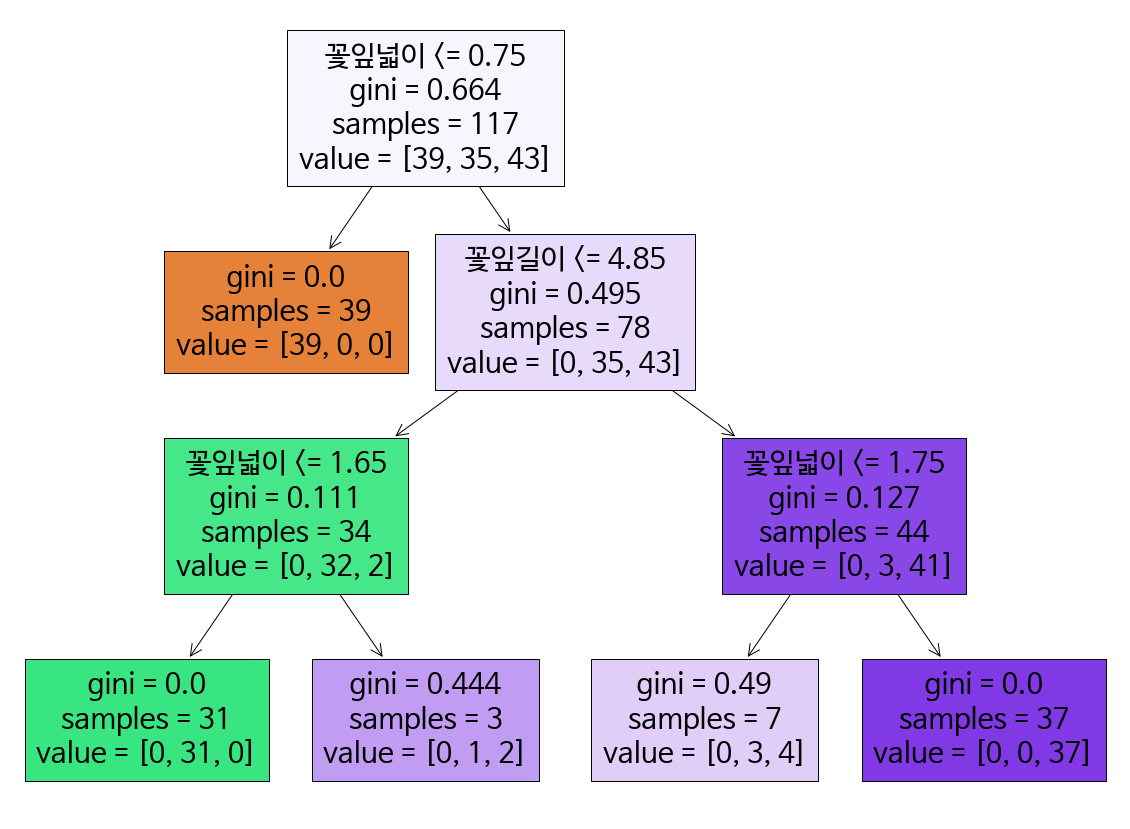

In [ ]:
#Step 6. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure( figsize=(20,15))
plot_tree(dt, filled=True ,
          feature_names= ['꽃받침길이','꽃받침넓이','꽃잎길이','꽃잎넓이'] )

plt.show()